In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

path = os.getcwd() + '\\ex1data1.txt'  #creation du chemin du fichier
data = pd.read_csv(path, header=None, names=['Population', 'Profit']) #lecture du fichier
data.head() #affichage du fichier
data.describe() #affichage des donnes

data.insert(0,'ones',1) #on ajoute une colonne de 1 pour les dimensions et calcul matriciel

cols = data.shape[1] #separation des donnees
x = data.iloc[:,0:cols-1] # variable d'entree
y = data.iloc[:,cols-1:cols] # variable de sortie 

<Axes: xlabel='Population', ylabel='Profit'>

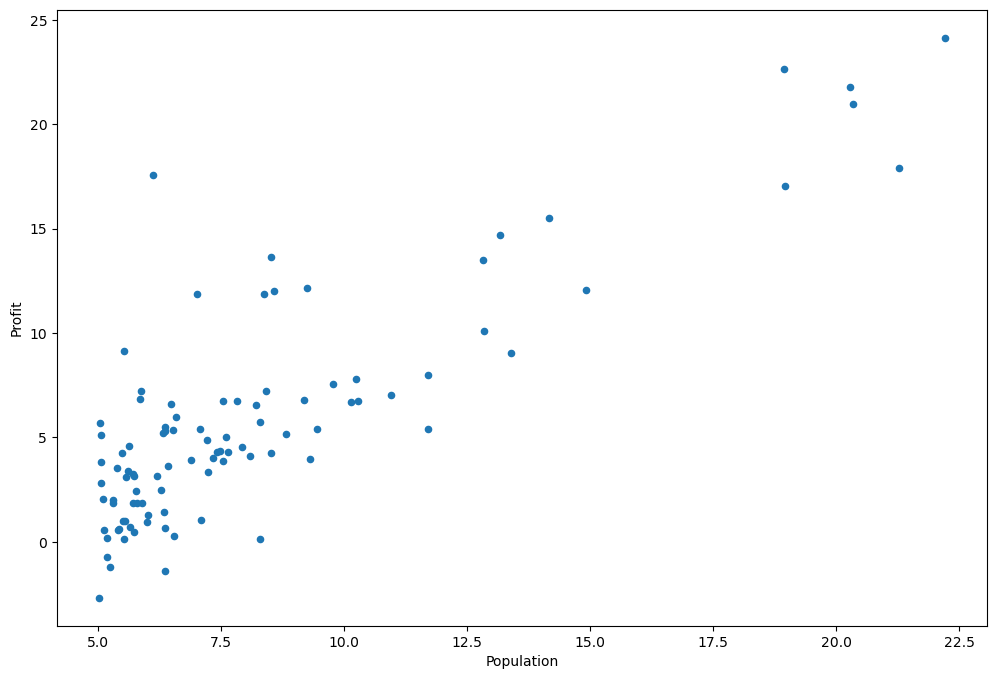

In [29]:
data.plot(kind='scatter', x='Population',y='Profit', figsize=(12,8)) #afficher les statistiques decrivant les donnees

In [30]:
# création d'une fonction pour calculer le cout d'une solution donnée 
def computeCost (x, y, theta):
    inner = np.power(((x * theta.T) -y), 2)
    return np.sum(inner) / (2 * len(x))

# conversion des donnée en matrice
x = np.matrix(x.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))
#calcule de fonction de cout 
print(computeCost(x, y, theta))

32.072733877455676


In [31]:
# définition d'une fonction qui effectue une descente de gradient
def gradientDescent(x, y, theta, alpha, iters):
    costs = []
    for i in range(iters):
        current_cost = computeCost(x,y,theta)
        costs.append(current_cost)
        delta_cost = (1/len(x))*np.dot(x.T,((x*theta.T)-y))
        theta = theta-(alpha * delta_cost.T)
    return theta, current_cost, costs
    
theta = np.matrix(np.array([0, 0]))
alpha = 0.01  # Taux d'apprentissage
iters = 1000
g,cost, cost_histo = gradientDescent(x, y, theta, alpha, iters)

Text(0.5, 1.0, 'Predicted Profil vs. Population Size')

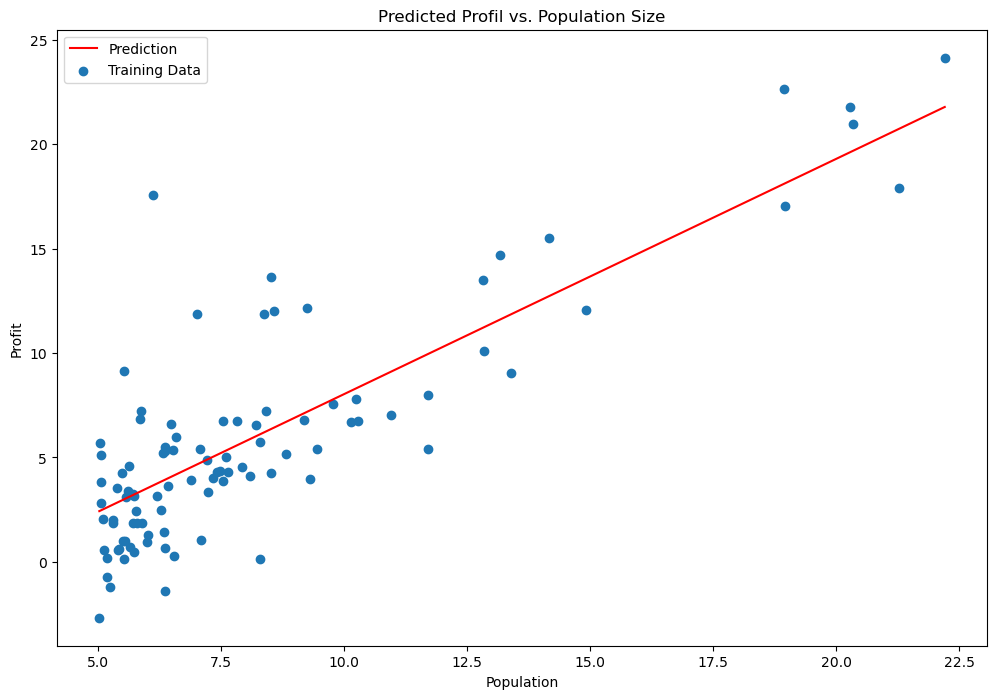

In [32]:
# visualisation des résultats

# traçons le modéle linéaire
x=np.linspace(data.Population.min(),data.Population.max(),100)
f=g[0,0]+(g[0,1]*x)
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(x,f,'r',label='Prediction')
ax.scatter(data.Population,data.Profit,label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profil vs. Population Size')

Text(0.5, 1.0, 'Cost vs. Iterations')

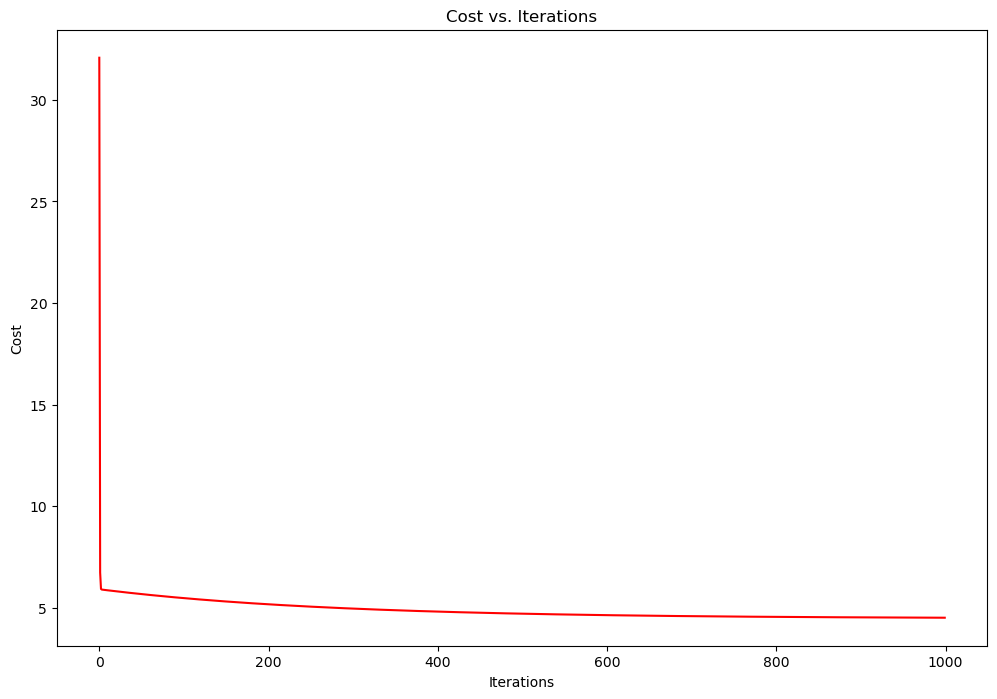

In [33]:
#traçons le vecteur avec le cout à chaque itération d'apprentissage 
iters = len(cost_histo)
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost_histo,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Cost vs. Iterations')

Text(0.5, 1.0, 'Cost vs. Iterations')

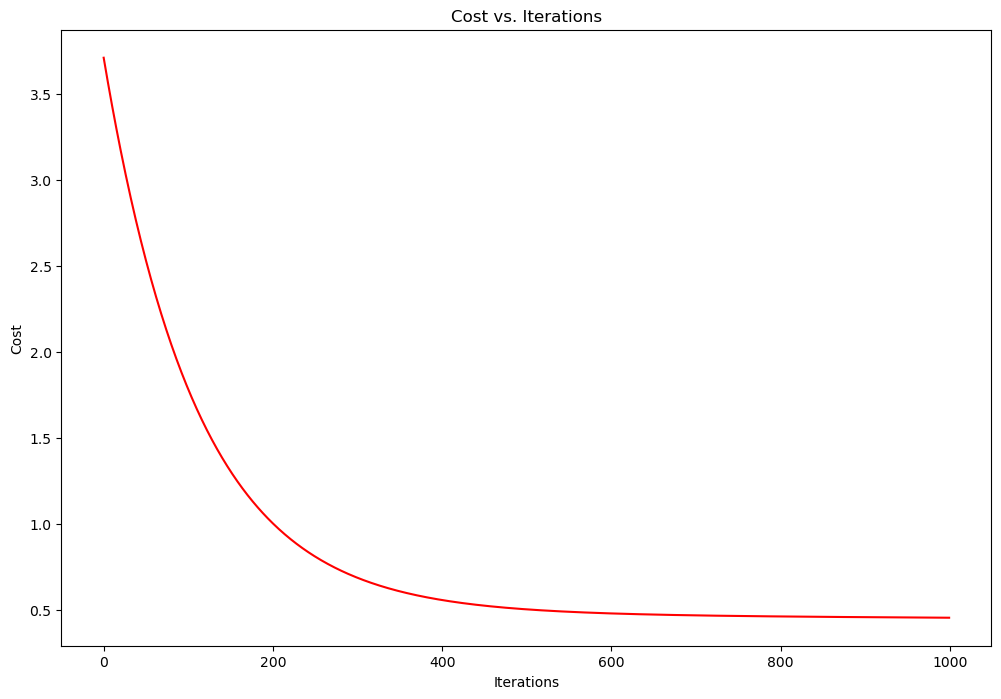

In [34]:
#Régression linéaire à variable multiple
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
data = pd.read_csv('ex1data2.txt', header=None, names=['Taille', 'Chambres', 'Prix'])

# Normalisation des données
scaler = MinMaxScaler()
data[['Taille', 'Chambres', 'Prix']] = scaler.fit_transform(data[['Taille', 'Chambres', 'Prix']])

# Définition des variables et de la cible
X = data[['Taille', 'Chambres']]
y = data['Prix']

X = np.matrix(X.values)
y = np.matrix(y.values)

# Initialisation à 0 de Thetha
theta = np.matrix(np.zeros(X.shape[1]))

g,cost, cost_histo=gradientDescent(X,y,theta,alpha=0.01,iters=1000)

# Evolution du côut
iters = len(cost_histo)
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost_histo,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Cost vs. Iterations')

In [35]:
# Importer les données du fichier ex1data2
data = pd.read_csv('ex1data2.txt', header=None, names=['Taille', 'Chambres', 'Prix'])

# Normalisation des données
scaler = MinMaxScaler()
data[['Taille', 'Chambres', 'Prix']] = scaler.fit_transform(data[['Taille', 'Chambres', 'Prix']])

# Création du modèle de régression
X = data[['Taille', 'Chambres']]
y = data['Prix']

model = LinearRegression()

# Entraînement du modèle
model.fit(X, y)

# Analyse des résultats
coef = model.coef_
intercept = model.intercept_
predictions = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, predictions))

print("Coefficients :", coef)
print("RMSE :", rmse)

Coefficients : [ 0.95241114 -0.06594731]
RMSE : 0.12061548726390435
